##### This program shows Support vector Machine (SVM) model is the best after hyper parameter tunning
The diabetes dataset is taken from [ Kaggle.com].The final score of ML model  is not great due to less data rows

In [1]:
#reading dataset 
import pandas as pd

df= pd.read_csv("Diabetes_data.csv")

df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [2]:
#replacing text into numbers in target variable
df.diabetes = df.diabetes.map({False: 0,True: 1})
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


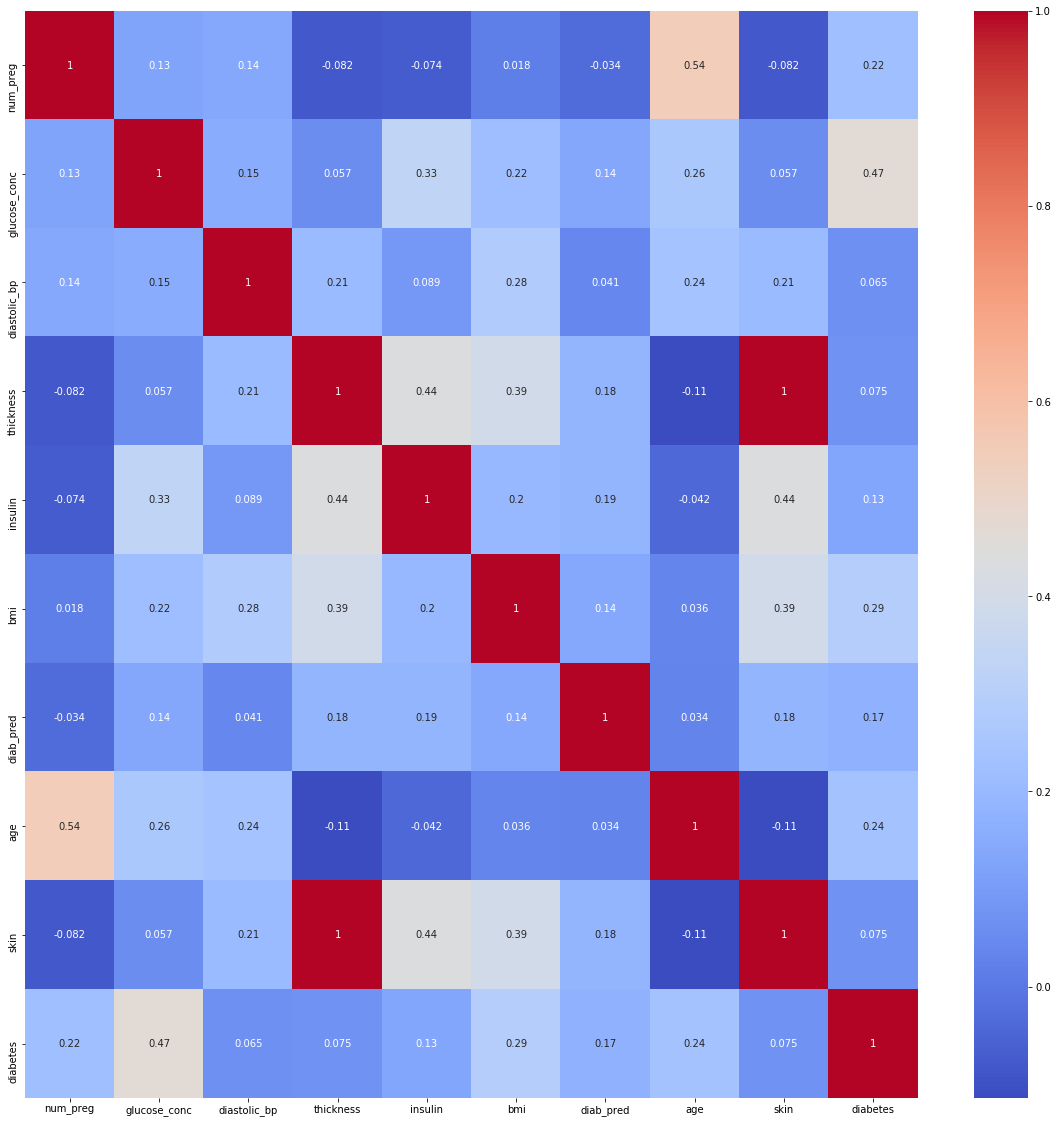

In [3]:
#Finding corelation between features
import matplotlib.pyplot as plt
import seaborn as sns
#Finding correlations between features
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [4]:
#counting true and false targets
true_count = len(df.loc[df['diabetes'] == 1])
false_count = len(df.loc[df['diabetes'] == 0])
(true_count,false_count)

(268, 500)

In [5]:
print("total number of rows :",len(df))

total number of rows : 768


In [6]:
# sepating target vaiable from data
output=df.diabetes
inputs=df.drop('diabetes',axis=1)
inputs[inputs.columns[0:9]]

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912
764,2,122,70,27,0,36.8,0.340,27,1.0638
765,5,121,72,23,112,26.2,0.245,30,0.9062
766,1,126,60,0,0,30.1,0.349,47,0.0000


In [7]:
#replacing missing data from data set
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy='mean')
inputs = fill_values.fit_transform(inputs)

In [8]:
#performing standardization on data
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
inputs= standardScaler.fit_transform(inputs)

In [9]:
## Hyperparameter optimization using GridSearchCV for SVM
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf','linear']
}, cv=5, return_train_score=False)
clf.fit(inputs,output)
clf.cv_results_

{'mean_fit_time': array([0.0192965 , 0.01599741, 0.01599908, 0.08436913, 0.0343729 ,
        0.29762406]),
 'std_fit_time': array([3.85447748e-03, 2.00611915e-06, 3.64086326e-06, 7.65438351e-03,
        6.24914181e-03, 1.45141607e-01]),
 'mean_score_time': array([0.00399847, 0.00160027, 0.00479999, 0.        , 0.00312533,
        0.00319929]),
 'std_score_time': array([0.00357622, 0.00320053, 0.00391917, 0.        , 0.00625067,
        0.00391832]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [10]:
df1 = pd.DataFrame(clf.cv_results_)
df1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019297,0.003854,0.003998,0.003576,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.740260,0.733766,0.753247,0.784314,0.758170,0.753951,0.017522,4
1,0.015997,0.000002,0.001600,0.003201,1,linear,"{'C': 1, 'kernel': 'linear'}",0.753247,0.740260,0.779221,0.810458,0.758170,0.768271,0.024544,1
2,0.015999,0.000004,0.004800,0.003919,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.694805,0.694805,0.720779,0.810458,0.751634,0.734496,0.043365,6
3,0.084369,0.007654,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",0.753247,0.740260,0.779221,0.810458,0.758170,0.768271,0.024544,1
4,0.034373,0.006249,0.003125,0.006251,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.714286,0.694805,0.733766,0.797386,0.751634,0.738375,0.035094,5
5,0.297624,0.145142,0.003199,0.003918,20,linear,"{'C': 20, 'kernel': 'linear'}",0.753247,0.740260,0.779221,0.810458,0.758170,0.768271,0.024544,1


In [11]:
df1[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.753951
1,1,linear,0.768271
2,10,rbf,0.734496
3,10,linear,0.768271
4,20,rbf,0.738375
5,20,linear,0.768271


In [12]:
#gives best parameters
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [13]:
clf.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler 
import numpy as np
from sklearn. model_selection import StratifiedKFold

#performing 10 flod cross validation on data
folds = StratifiedKFold(n_splits=10)



scores_svm_before_hyperparameter_tuning = []
scores_svm_after_hyperparameter_tuning = []
#scores_rf = []

#splitting data into train and test
for train_index, test_index in folds.split(inputs,output):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = inputs[train_index], inputs[test_index]
    y_train, y_test = output[train_index], output[test_index]
                                       
    #calculating mean score of a model by performing 10 flod crossfold validation
    
    #Model without hyperparameter tuning
    scores_svm_before_hyperparameter_tuning.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    
    #Model with hyperparameter tuning
    scores_svm_after_hyperparameter_tuning.append(get_score(SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False), X_train, X_test, y_train, y_test))
    
    
    
    #scores_rf.append(get_score(RandomForestClassifier(n_estimators=30), X_train, X_test, y_train, y_test))

In [30]:
#performance berfore hypertuning of parameters
np.mean(scores_svm_before_hyperparameter_tuning)

0.7513157894736843

In [31]:
#performance after hypertuning of parameters
np.mean(scores_svm_after_hyperparameter_tuning)

0.7721462747778538